In [ ]:
pip install control

In [ ]:
import control as ctrl
from control import matlab
import numpy as np
from numpy.linalg import matrix_rank
from numpy.linalg import eigvals
import matplotlib.pyplot as plt

CIRCUITO ELÉTRICO DE ORDEM 3

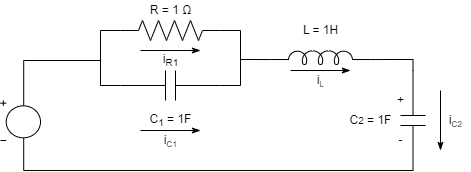

MODELAGEM EM ESPAÇOS DE ESTADO

In [ ]:
##Sistema em E.E. Modelado

A = [[-1,1,0],[-1,0,-1],[0,1,0]]
B = [[0],[1],[0]]
C = [0,0,1]
D = [0]

system = matlab.ss(A,B,C,D)

CALCULO DA FUNÇÃO DE TRANSFERENCIA

In [ ]:
system_tf = matlab.ss2tf(A,B,C,D) #Função de transferencia partindo dos Espaços de Estados

print('\033[1m'+'FUNÇÃO DE TRANSFERENCIA DO SISTEMA:'+'\033[0m')
print(system_tf)

FUNÇÃO DE TRANSFERENCIA DO SISTEMA:

-3.331e-16 s^2 + s + 1
----------------------
 s^3 + s^2 + 2 s + 1



SIMULAÇÃO DE MODELO

In [ ]:
tempo = np.arange(0,60,0.01) ##Vetor de tempo (60 segundos)
u_degrau = np.full(len(tempo),1) #Sinal de entrada (Degrau unitário)
u_rampa = np.full(len(tempo),tempo) ##Sinal de entrada (Rampa)
u_parabola = np.full(len(tempo),tempo**2) ##Sinal de entrada(Parábola)

In [ ]:
print('Degrau:\n',u_degrau)
print('Rampa\n',u_rampa)
print('Parábola:\n',u_parabola)

Degrau:
 [1 1 1 ... 1 1 1]
Rampa
 [0.000e+00 1.000e-02 2.000e-02 ... 5.997e+01 5.998e+01 5.999e+01]
Parábola:
 [0.0000000e+00 1.0000000e-04 4.0000000e-04 ... 3.5964009e+03 3.5976004e+03
 3.5988001e+03]


In [ ]:
y_d, t_d, x_d = matlab.lsim(system, u_degrau, tempo) #Resposta do sistema so Degrau
y_r, t_r, x_r = matlab.lsim(system, u_rampa, tempo) #Resposta do sistema à Rarábola
y_p, t_p, x_p = matlab.lsim(system, u_parabola, tempo) #Resposta do sistema Parábola

RESPOSTA TEMPORAL DO SISTEMA

RESPOSTA AO DEGRAU:


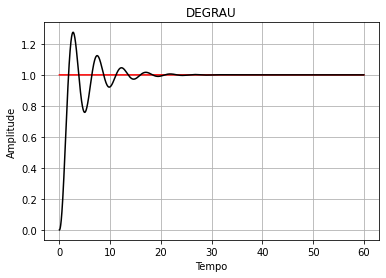


RESPOSTA À RAMPA:


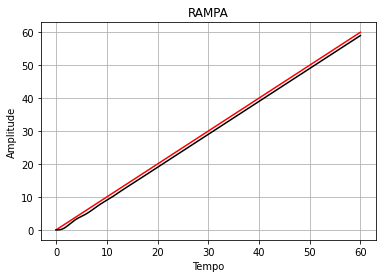


RESPOSTA À PARÁBOLA:


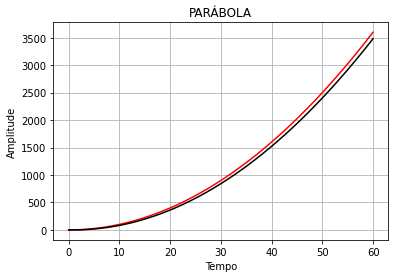

In [ ]:
def Resposta(t, y, sinal,title, xlabel, ylabel):
  plt.plot(t, sinal, 'red',)
  plt.plot(t, y, 'black',)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid(0.5)
  plt.show()
  print()

print('\033[1m'+'RESPOSTA AO DEGRAU'+'\033[0m:')
Resposta(tempo, y_d, u_degrau, 'DEGRAU','Tempo','Amplitude')

print('\033[1m'+'RESPOSTA À RAMPA'+'\033[0m:')
Resposta(tempo, y_r, u_rampa,'RAMPA','Tempo','Amplitude')

print('\033[1m'+'RESPOSTA À PARÁBOLA'+'\033[0m:')
Resposta(tempo, y_p, u_parabola,'PARÁBOLA','Tempo','Amplitude')

TIPO DO SISTEMA

In [ ]:
autovalores = eigvals(A)
print('POLOS DO SISTEMA EM  MALHA ABERTA:') #Os polos do sistema são os autovalores da matriz A
print(autovalores) #O número de polos na origem pode ser usado para determinar o tipo do sistema (Tipo 0)

POLOS DO SISTEMA EM  MALHA ABERTA:
[-0.56984029+0.j         -0.21507985+1.30714128j -0.21507985-1.30714128j]


Sistema do tipo 0

CRITÉRIOS DE DESEMPENHO

In [ ]:
print('\033[1m'+'CRITÉRIOS DE DESEMPENHO DO SISTEMA'+'\033[0m:')
ctrl.step_info(system) #Critérios de desempenho do sistema

CRITÉRIOS DE DESEMPENHO DO SISTEMA:


{'Overshoot': 27.412024245469247,
 'Peak': 1.2741202424546925,
 'PeakTime': 2.6449430397438554,
 'RiseTime': 1.133547017033081,
 'SettlingMax': 1.2741202424546925,
 'SettlingMin': 0.7591090829563235,
 'SettlingTime': 15.302884729946593,
 'SteadyStateValue': 1.0,
 'Undershoot': 0}

MATRIZ DE CONTROLABILIDADE

In [ ]:
#Matriz de Controlabilidade do sistema
CTR = matlab.ctrb(A,B)

print('\033[1m'+'MATRIZ DE CONTROLABILIDADE DO SISTEMA'+'\033[0m:')
print(CTR)

MATRIZ DE CONTROLABILIDADE DO SISTEMA:
[[ 0.  1. -1.]
 [ 1.  0. -2.]
 [ 0.  1.  0.]]


TESTE DE CONTROLABILIDADE

In [ ]:
print('\033[1m'+'POSTO DA MATRIZ DE CONTROLABILIDADE'+'\033[0m:')
print(matrix_rank(CTR))

POSTO DA MATRIZ DE CONTROLABILIDADE:
3


Sistema Controlável

MATRIZ DE OBSERVABILIDADE

In [ ]:
#Matriz de Observabilidade do sistema
OBS = matlab.obsv(A,C)

print('\033[1m'+'MATRIZ DE OBSERVABILIDADE DO SISTEMA'+'\033[0m:')
print(OBS)

MATRIZ DE OBSERVABILIDADE DO SISTEMA:
[[ 0.  0.  1.]
 [ 0.  1.  0.]
 [-1.  0. -1.]]


TESTE DE OBSERVABILIDADE

In [ ]:
print('\033[1m'+'POSTO DA MATRIZ DE OBSERVABILIDADE'+'\033[0m:')
print(matrix_rank(OBS))

POSTO DA MATRIZ DE OBSERVABILIDADE:
3


Sistema Observável